# Grammatiche come generatori

In [ ]:
from liblet import Grammar, Derivation, ProductionGraph

## Tipo 0

In [ ]:
# fig 2.3, pag. 14

grammar = """
Sentence -> Name | List End
List -> Name | Name , List
Name -> tom | dick | harry
, Name End -> and Name
"""

Tramite [liblet](https://liblet.readthedocs.io/) si può costruire una [grammatica](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Grammar) a partire da una descrizione testuale tramite [Grammar.from_string](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Grammar.from_string)

In [ ]:
G = Grammar.from_string(grammar, False)
G

Grammar(N={End, List, Name, Sentence}, T={,, and, dick, harry, tom}, P=(Sentence -> Name, Sentence -> List End, List -> Name, List -> Name , List, Name -> tom, Name -> dick, Name -> harry, , Name End -> and Name), S=Sentence)

In [ ]:
# Elenco (numerato) delle produzioni

G.P

(Sentence -> Name,
 Sentence -> List End,
 List -> Name,
 List -> Name , List,
 Name -> tom,
 Name -> dick,
 Name -> harry,
 , Name End -> and Name)

Fissata la grammatica, si può costruire una [derivazione](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Derivation) specificandone in passi, con [Derivation.step](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Derivation.step)

In [ ]:
# costruzione di una derivazione

d = Derivation(G)

In [ ]:
# i prossimi passi possibili

list(d.possible_steps())

[(0, 0), (1, 0)]

In [ ]:
# ne applico uno

d = d.step(1, 0)
d

Sentence -> List End

In [ ]:
# se volgio solo la forma sentenziale

d.sentential_form()

('List', 'End')

In [ ]:
# procedo con altri passi… 

d = d.step(3, 0)
d

Sentence -> List End -> Name , List End

In [ ]:
d = d.step(3, 2)
d

Sentence -> List End -> Name , List End -> Name , Name , List End

In [ ]:
d = (
  d.step(2, 4)
   .step(7, 3)
   .step(4, 0)
   .step(5, 2)
   .step(6, 4)
)
d

Sentence -> List End -> Name , List End -> Name , Name , List End -> Name , Name , Name End -> Name , Name and Name -> tom , Name and Name -> tom , dick and Name -> tom , dick and harry

Sebbene la rappresentazione testuale della derivazione sia piuttosto chiara, può aiutare averne una rappresentazione garfica, tramite un [ProductionGraph](https://liblet.readthedocs.io/en/latest/api.html#liblet.display.ProductionGraph)

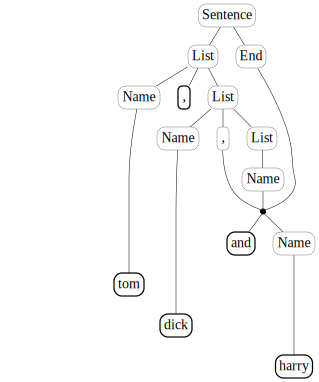

In [ ]:
ProductionGraph(d)

## Tipo 1

### Monotone

In [ ]:
# pag 20

monotonic = """
Sentence -> Name | List
List -> EndName | Name , List
Name -> tom | dick | harry
, EndName -> and Name
"""

In [ ]:
G_monotonic = Grammar.from_string(monotonic, False)
G_monotonic

Grammar(N={EndName, List, Name, Sentence}, T={,, and, dick, harry, tom}, P=(Sentence -> Name, Sentence -> List, List -> EndName, List -> Name , List, Name -> tom, Name -> dick, Name -> harry, , EndName -> and Name), S=Sentence)

### Context-sentitive

In [ ]:
# pag 20

context_sensitive = """
Sentence -> Name | List
List -> EndName | Name Comma List
Name -> tom | dick | harry
Comma EndName -> and EndName
and EndName -> and Name
Comma -> ,
"""

In [ ]:
G_cs = Grammar.from_string(context_sensitive, False)
G_cs

Grammar(N={Comma, EndName, List, Name, Sentence}, T={,, and, dick, harry, tom}, P=(Sentence -> Name, Sentence -> List, List -> EndName, List -> Name Comma List, Name -> tom, Name -> dick, Name -> harry, Comma EndName -> and EndName, and EndName -> and Name, Comma -> ,), S=Sentence)

In [ ]:
G_cs.P

(Sentence -> Name,
 Sentence -> List,
 List -> EndName,
 List -> Name Comma List,
 Name -> tom,
 Name -> dick,
 Name -> harry,
 Comma EndName -> and EndName,
 and EndName -> and Name,
 Comma -> ,)

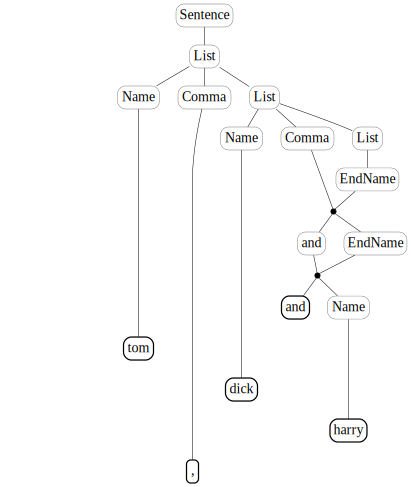

In [ ]:
steps = (1, 0), (3, 0), (3, 2), (2, 4), (7, 3), (8, 3), (4, 0), (5, 2), (6, 4), (9, 1)

d = Derivation(G_cs).step(steps)

ProductionGraph(d)

## Tipo 2 (Context-free)

In [ ]:
# pag 23

context_free = """
Sentence -> Name | List and Name
List -> Name , List | Name
Name -> tom | dick | harry
"""

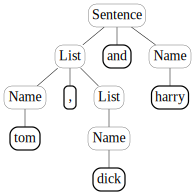

In [ ]:
steps = (1, 0), (2, 0), (3, 2), (4, 0), (5, 2), (6, 4)

G_cf = Grammar.from_string(context_free) # non c'è più il False

d = Derivation(G_cf).step(steps)

ProductionGraph(d) # finalmente un albero!

## Tipo 3 (Regolari)

In [ ]:
# fig. 2.14, pag. 31

regular = """
Sentence -> tom | dick | harry | List
List -> tom ListTail | dick ListTail | harry ListTail
ListTail -> , List | and tom | and dick | and henry
"""

regular_strict = """
Sentence -> tom | dick | harry | List
List -> tom ListTail | dick ListTail | harry ListTail
ListTail -> , List | and Tom | and Dick | and Henry
Tom -> tom
Dick -> dick
Henry -> henry
"""

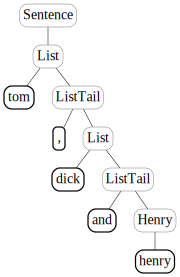

In [ ]:
G_regular = Grammar.from_string(regular_strict)

steps = (3, 0), (4, 0), (7, 1), (5, 2), (10, 3), (13, 4)

d = Derivation(G_regular).step(steps)

ProductionGraph(d) # una "lista"

## Generare le parole

In [ ]:
from liblet import Queue

In [ ]:
# compie max_step passi di visita in ampiezza del grafo
# implicito delle derivazioni, restituendo l'eneco di derivazioni
# che contucono ad una forma sentenziale composta solo di terminali

def produce(G, max_steps = 1):
    Q = Queue([Derivation(G)])
    D = [] 
    step = 0
    while Q:
        if step > max_steps: break
        step += 1
        derivation = Q.dequeue()
        if set(derivation.sentential_form()) <= G.T: 
            D.append(derivation)
        for prod, pos in derivation.possible_steps():
            Q.enqueue(derivation.step(prod, pos))
    return D

In [ ]:
# la grammatica dell'esercizio facoltativo

G = Grammar.from_string("""
S -> a b c
S -> a S Q
b Q c -> b b c c
c Q -> Q c
""", False)

In [ ]:
# 10k passi per 42 derivazioni!

deriv = produce(G, 10_000)
len(deriv)

42

In [ ]:
# ma solo 5 parole distinte (come mai?)

words = set(''.join(d.sentential_form()) for d in deriv)
len(words)

5

In [ ]:
print(words)

{'aaaabbbbcccc', 'aabbcc', 'aaabbbccc', 'abc', 'aaaaabbbbbccccc'}


# Fare pulizia nelle CF

## Una nozione di chiusura

Applicare il decoratore [@closure](https://liblet.readthedocs.io/en/latest/api.html#liblet.decorators.closure) ad una funzione `f`  produce una funzione `F` che corrisponde all'applicazione di `f` iterata sino a quando l'argomento ed il valore restituito da quest'ultima coincidono.

In [ ]:
from liblet import closure 

@closure
def add_smaller(S):
    return S | {x - 1 for x in S if x > 0}

In [ ]:
add_smaller({3, 5})

{0, 1, 2, 3, 4, 5}

## Eliminare simboli non produttivi e/o irraggiungibili

In [ ]:
# fig 2.27, pag. 49

G = Grammar.from_string("""
S -> A B | D E
A -> a
B -> b C
C -> c
D -> d F 
E -> e 
F -> f D
""")
G

Grammar(N={A, B, C, D, E, F, S}, T={a, b, c, d, e, f}, P=(S -> A B, S -> D E, A -> a, B -> b C, C -> c, D -> d F, E -> e, F -> f D), S=S)

In [ ]:
def find_productive(G):
  
  @closure
  def find(prod):
    return prod | {A for A, α in G.P if set(α) <= prod}
  
  return find(G.T)

find_productive(G)

frozenset({'A', 'B', 'C', 'E', 'S', 'a', 'b', 'c', 'd', 'e', 'f'})

In [ ]:
from liblet import union_of

def find_reachable(G):

  @closure
  def find(reach):
    return reach | union_of(set(α) for A, α in G.P if A in reach)
  
  return find({G.S})

find_reachable(G)

{'A', 'B', 'C', 'D', 'E', 'F', 'S', 'a', 'b', 'c', 'd', 'e', 'f'}

In [ ]:
def remove_unproductive_unreachable(G):
    Gp = G.restrict_to(find_productive(G))
    return Gp.restrict_to(find_reachable(Gp))

remove_unproductive_unreachable(G)

Grammar(N={A, B, C, S}, T={a, b, c}, P=(S -> A B, A -> a, B -> b C, C -> c), S=S)